In [3]:
print("Shree")

Shree


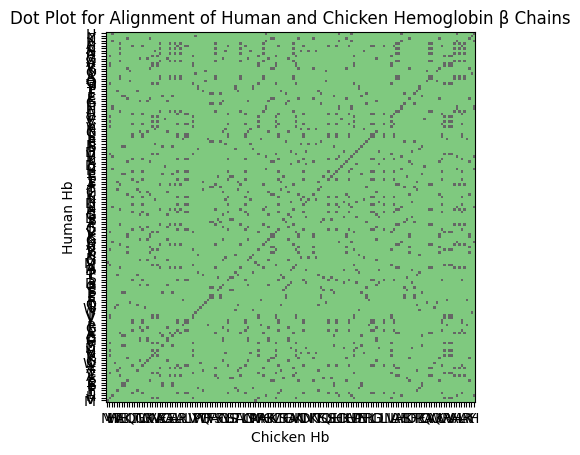

Maximum matching sequence: LSELHCDKLHVDPENFRLLG


In [3]:
# Atharva Mandar Phatak | BE21B009 | BT3040 Assignment 4
#Q1 

import matplotlib.pyplot as plt

def dot_plot(seq1, seq2):
    len1 = len(seq1)
    len2 = len(seq2)
    
    dot_plot = [[0] * len2 for _ in range(len1)]
    
    # Fill the dot plot
    for i in range(len1):
        for j in range(len2):
            if seq1[i] == seq2[j]:
                dot_plot[i][j] = 1

    # Create the plot
    plt.imshow(dot_plot,cmap='Accent', interpolation='nearest')
    plt.xlabel('Chicken Hb')
    plt.ylabel('Human Hb')
    plt.title('Dot Plot for Alignment of Human and Chicken Hemoglobin β Chains')
    plt.xticks(range(len2), seq2)
    plt.yticks(range(len1), seq1)
    plt.gca().invert_yaxis() 
    plt.show()

def similar_seq(seq1, seq2):
    posn_vals= []
    for i in range(len(seq1)):
        if seq1[i] == seq2[i]:
            posn_vals.append(i+1)
        

    return posn_vals

#Given Sequences
human_hb = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
chicken_hb = "MVHWTAEEKQLITGLWGKVNVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENFRLLGDILIIVLAAHFSKDFTPECQAAWQKLVRVVAHALARKYH"



dot_plot(human_hb, chicken_hb)
segments_indx = similar_seq(human_hb, chicken_hb)

def align_seq_output(segments):
    segs=segments
    seq=[]
    counter=0
    templst=[]

    while(counter<(len(segs)-1)):
        
        if counter==0:
            templst.append(segments[counter])
            
        if segs[counter+1]==(segs[counter]+1):
            templst.append(segments[counter+1])
        

        else:
        
            seq.append(templst)
            templst=[]
            templst.append(segments[counter+1])
            
        
        counter=counter+1
            
        
    seq_len=[len(i) for i in seq ]

    alignstr=""
    for i in seq[seq_len.index(max(seq_len))]:
        alignstr=alignstr+str(human_hb[i-1])
    print("Maximum matching sequence:", alignstr)

align_seq_output(segments_indx)
 


In [64]:
# Atharva Mandar Phatak | BE21B009 | BT3040 Assignment 4
#Q2

inp_seq1='AATCTATA'
inp_seq2='AAG--ATA'


#Finding the total score (excluding penalty) 
def score_find(seq1,seq2):
    score=0
    for i in range(len(seq1)):
        if(seq1[i]==seq2[i]):
            score=score+1
        elif(seq1[i]!=seq2[i]):
            score=score+0
    return score

F#Finding the penalty, and later subtracting from the total score 
def penalty_find(seq2):
    count_arr=[]
    counter=0
    
    for i in range(len(seq2)):
        
        if(seq2[i]=='-'):
            counter+=1
        else:
            count_arr.append(counter)
            counter=0

    tot_penalty_vals=[]
    for i in count_arr:
        if(i!=0):
            tot_penalty_vals.append(i*(-1)-2)
    return(sum(tot_penalty_vals))

final_score= score_find(inp_seq1,inp_seq2)+penalty_find(inp_seq2)
print("Final Score =",final_score)


Final Score = 1


In [14]:
# Atharva Mandar Phatak | BE21B009 | BT3040 Assignment 4
#Q4

def needleman_wunsch(seq1, seq2, match_score=+2, mismatch_penalty=-1, gap_penalty=-2):
    # Initialize the score matrix
    score_matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the traceback matrix to store directions
    traceback_matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column of the score matrix
    for i in range(1, len(seq1) + 1):
        score_matrix[i][0] = gap_penalty * i
        traceback_matrix[i][0] = 'U'  # 'U' indicates up

    for j in range(1, len(seq2) + 1):
        score_matrix[0][j] = gap_penalty * j
        traceback_matrix[0][j] = 'L'  # 'L' indicates left

    # Fill the score and traceback matrices
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_penalty)
            delete = score_matrix[i - 1][j] + gap_penalty
            insert = score_matrix[i][j - 1] + gap_penalty
            score_matrix[i][j] = max(match, delete, insert)

            # Update traceback matrix
            if score_matrix[i][j] == match:
                traceback_matrix[i][j] = 'D'  # 'D' indicates diagonal
            elif score_matrix[i][j] == delete:
                traceback_matrix[i][j] = 'U'  # 'U' indicates up
            else:
                traceback_matrix[i][j] = 'L'  # 'L' indicates left

    # Traceback to find the alignment
    alignment_seq1 = ''
    alignment_seq2 = ''
    i, j = len(seq1), len(seq2)
    while i > 0 or j > 0:
        if traceback_matrix[i][j] == 'D':
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == 'U':
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = '-' + alignment_seq2
            i -= 1
        else:
            alignment_seq1 = '-' + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            j -= 1

    return score_matrix, alignment_seq1, alignment_seq2

# Example sequences
sequence1 = "ACAGTCGAACG"
sequence2 = "ACCGTCCG"

# Call the needleman_wunsch function
score_table, aligned_seq1, aligned_seq2 = needleman_wunsch(sequence1, sequence2)

# Print the alignment and the partial alignment score table
print("Sequence 1:", aligned_seq1)
print("Sequence 2:", aligned_seq2)

print("\nPartial Alignment Score Table:")
for row in score_table:
    print(row)
print(" ")
print(f"Aligmnent Score = {max(score_table[-1])}")

Sequence 1: ACAGTCGAACG
Sequence 2: ACCGTC---CG

Partial Alignment Score Table:
[0, -2, -4, -6, -8, -10, -12, -14, -16]
[-2, 2, 0, -2, -4, -6, -8, -10, -12]
[-4, 0, 4, 2, 0, -2, -4, -6, -8]
[-6, -2, 2, 3, 1, -1, -3, -5, -7]
[-8, -4, 0, 1, 5, 3, 1, -1, -3]
[-10, -6, -2, -1, 3, 7, 5, 3, 1]
[-12, -8, -4, 0, 1, 5, 9, 7, 5]
[-14, -10, -6, -2, 2, 3, 7, 8, 9]
[-16, -12, -8, -4, 0, 1, 5, 6, 7]
[-18, -14, -10, -6, -2, -1, 3, 4, 5]
[-20, -16, -12, -8, -4, -3, 1, 5, 3]
[-22, -18, -14, -10, -6, -5, -1, 3, 7]
 
Aligmnent Score = 7


In [11]:
# Atharva Mandar Phatak | BE21B009 | BT3040 Assignment 4
#Q6
def smith_waterman(seq1, seq2, match=2, mismatch=-1, gap=-2):
    # Initialize the scoring matrix
    rows = len(seq1) + 1
    cols = len(seq2) + 1
    score_matrix = [[0] * cols for _ in range(rows)]

    # Fill the scoring matrix
    for i in range(1, rows):
        for j in range(1, cols):
            if seq1[i - 1] == seq2[j - 1]:
                diag_score = score_matrix[i - 1][j - 1] + match
            else:
                diag_score = score_matrix[i - 1][j - 1] + mismatch
            
            up_score = score_matrix[i - 1][j] + gap
            left_score = score_matrix[i][j - 1] + gap

            score_matrix[i][j] = max(0, diag_score, up_score, left_score)

    # Find the maximum score in the matrix
    max_score = 0
    max_i, max_j = 0, 0
    for i in range(rows):
        for j in range(cols):
            if score_matrix[i][j] > max_score:
                max_score = score_matrix[i][j]
                max_i, max_j = i, j
    #Align Output Sequence
    # Traceback to find the alignment
    alignment_seq1 = ""
    alignment_seq2 = ""
    i, j = max_i, max_j
    while score_matrix[i][j] != 0:
        if score_matrix[i][j] == score_matrix[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch):
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            i -= 1
            j -= 1
        elif score_matrix[i][j] == score_matrix[i - 1][j] + gap:
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = '-' + alignment_seq2
            i -= 1
        else:
            alignment_seq1 = '-' + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            j -= 1

    return alignment_seq1, alignment_seq2, max_score, score_matrix

def print_matrix(matrix):
    for row in matrix:
        print(row)

def main():
    seq1 = "ACGTATCGCGTATA"
    seq2 = "GATGCGTATCG"

    alignment_seq1, alignment_seq2, max_score, score_matrix = smith_waterman(seq1, seq2)

    print("Alignment Sequence 1:", alignment_seq1)
    print("Alignment Sequence 2:", alignment_seq2)
    print("Alignment Score:", max_score)
    print("\nScoring Matrix:")
    print_matrix(score_matrix)

if __name__ == "__main__":
    main()


Alignment Sequence 1: CGTATCG
Alignment Sequence 2: CGTATCG
Alignment Score: 14

Scoring Matrix:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0]
[0, 2, 0, 0, 3, 1, 4, 2, 0, 0, 0, 4]
[0, 0, 1, 2, 1, 2, 2, 6, 4, 2, 0, 2]
[0, 0, 2, 0, 1, 0, 1, 4, 8, 6, 4, 2]
[0, 0, 0, 4, 2, 0, 0, 3, 6, 10, 8, 6]
[0, 0, 0, 2, 3, 4, 2, 1, 4, 8, 12, 10]
[0, 2, 0, 0, 4, 2, 6, 4, 2, 6, 10, 14]
[0, 0, 1, 0, 2, 6, 4, 5, 3, 4, 8, 12]
[0, 2, 0, 0, 2, 4, 8, 6, 4, 2, 6, 10]
[0, 0, 1, 2, 0, 2, 6, 10, 8, 6, 4, 8]
[0, 0, 2, 0, 1, 0, 4, 8, 12, 10, 8, 6]
[0, 0, 0, 4, 2, 0, 2, 6, 10, 14, 12, 10]
[0, 0, 2, 2, 3, 1, 0, 4, 8, 12, 13, 11]
